In [34]:
# -------------------------------------------------- #
# CereGate Technical Assessment
# Part 1
# Jose Garcia Higuera
# Runninging in Windows OS
# TODO: Requirements.txt file
# -------------------------------------------------- #

# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from scipy import stats

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Plot configuration - Using scientific library
plt.style.use(['science','grid'])


# Goal
Based on 2 privat files the goal is to understand the data and explore som ML algorithms to predict the labels.

Two datasets are given. Train and Test

# Exploratory Data Analysis

In [35]:
# Data reading
data_train = pd.read_csv(r'..\data\train.csv')
data_test = pd.read_csv(r'..\data\test.csv')

# Checking length of dataset
print('Length Train Dataset',len(data_train))
print('Length Test Dataset',len(data_test))

# Check data
data_train.head()

Length Train Dataset 1219
Length Test Dataset 244


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Label
0,0.500,0.620,0.500,0.293333,0.16,0.176471,0
1,0.250,0.800,0.575,0.533333,0.20,0.294118,0
2,0.250,0.720,0.300,0.120000,0.20,0.264706,1
3,0.250,0.680,0.600,0.233333,0.24,0.294118,0
4,0.125,0.884,0.325,0.266667,0.20,0.323529,0


In [36]:
# Check types and empty values
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  1219 non-null   float64
 1   Feature 2  1219 non-null   float64
 2   Feature 3  1219 non-null   float64
 3   Feature 4  1219 non-null   float64
 4   Feature 5  1219 non-null   float64
 5   Feature 6  1219 non-null   float64
 6   Label      1219 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 66.8 KB


In [37]:
# Check types and empty values
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  244 non-null    float64
 1   Feature 2  244 non-null    float64
 2   Feature 3  244 non-null    float64
 3   Feature 4  244 non-null    float64
 4   Feature 5  244 non-null    float64
 5   Feature 6  244 non-null    float64
 6   Label      244 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.5 KB


In [38]:
# Summary of numerical attributes for continuous variables
data_train.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Label
count,1219.000000,1219.000000,1219.00000,1219.000000,1219.000000,1219.000000,1219.000000
mean,0.324754,0.645421,0.50160,0.341963,0.189073,0.219116,0.507793
std,0.123297,0.153248,0.14081,0.171458,0.040612,0.064817,0.500144
min,0.125000,0.120000,0.15000,0.033333,0.040000,0.044118,0.000000
25%,0.250000,0.520000,0.45000,0.200000,0.160000,0.191176,0.000000
50%,0.250000,0.640000,0.50000,0.300000,0.200000,0.205882,1.000000
75%,0.375000,0.800000,0.60000,0.466667,0.200000,0.264706,1.000000
max,1.000000,1.000000,0.87500,0.933333,0.600000,0.573529,1.000000


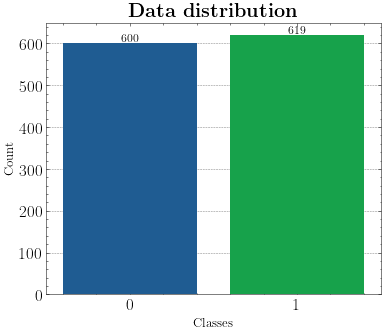

In [39]:
## Distribution od the classes
# PLOTS
plt.style.use(['science','grid'])
plt.rcParams['figure.figsize']=[6,5]
plt.rcParams.update({'font.size': 17})

# plt.figure(figsize=(25,7))

plt.title("Class distribution")

a = sns.countplot(x='Label', data=data_train)
a.bar_label(a.containers[0],size=12)
a.set_xlabel("Classes",fontsize=13)
a.set_ylabel("Count",fontsize=13)
a.axes.set_title(r'\textbf{Data distribution}',size=20)
plt.show()


Text(0.5, 1.0, '\\textbf{Box plots for the features}')

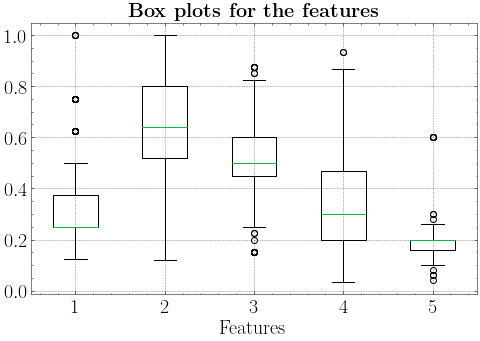

In [40]:
## Distribution of some features in order to check if normalization needed
# create a figure with a single axis
plt.rcParams['figure.figsize']=[8,5]
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots()

# create a box plot for each feature in the dataset
ax.boxplot(data_train[['Feature 1', 'Feature 2','Feature 3','Feature 4','Feature 5']].values)
ax.set_xticklabels(['1', '2','3','4','5'])

plt.xlabel('Features', size = 20)
# plt.ylabel('Features', size = 12)
plt.title(r'\textbf{Box plots for the features}', size = 20)

I will plot the variables related between them to look visually possibilities of separability

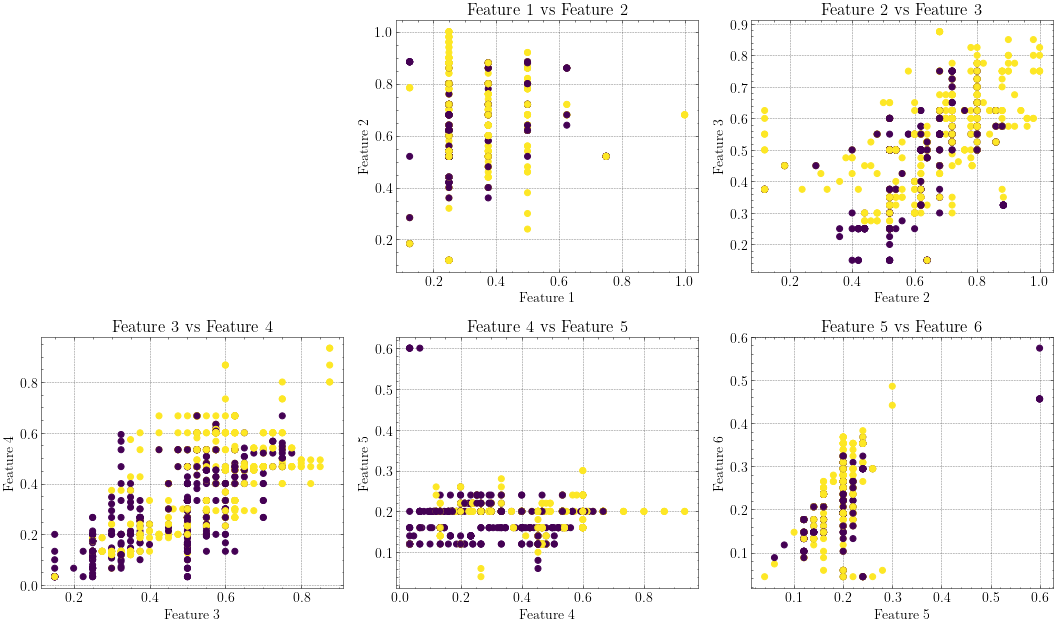

In [62]:
# Plots of the variables related between them to look visualy possibities of separability

plt.figure(figsize=(15,9))

for i in range(1,6):
    plt.subplot(231+i)
    plt.scatter(x=data_train[f"Feature {i}"],y=data_train[f"Feature {i+1}"], c = data_train['Label'])
    plt.xlabel(f'Feature {i}')
    plt.ylabel(f'Feature {i+1}')
    plt.title(f'Feature {i} vs Feature {i+1} ')
    plt.tight_layout()



The yellow points are the class 1 and the purple the class 0.

From the previous scatter plot and boxplot, I could see that the features are hard to separate with a linear model. In the case of a possible MLP (MultiLayer Perceptron), model based on lineal model with non-linearities (activation function), it seems to need many layers in order reach some effective separation between the classes.

Text(0.5, 1.0, '\\textbf{Correlation Matrix}')

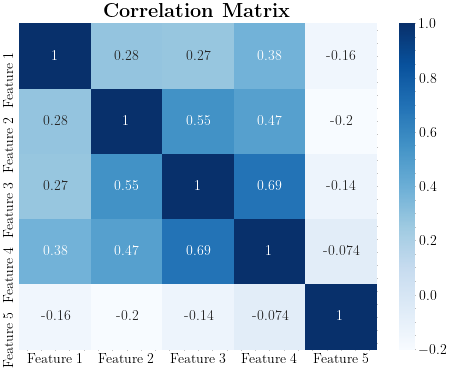

In [46]:
#Plotting  example of the correlation matrix
plt.rcParams['figure.figsize']=[8,6]
plt.rcParams.update({'font.size': 14})

# Correlation Matrix (Pearson)
corrmat = data_train.corr()

g=sns.heatmap(corrmat[corrmat.columns[:5]][:5] ,annot=True,cmap='Blues')

# plt.xlabel('Features', size = 20)
# plt.ylabel('Features', size = 20)
plt.title(r'\textbf{Correlation Matrix}', size = 20)


### Conclusions from the EDA

- Balanced dataset
- No Empty values
- The distributions of the features are different 
- No need to encoding features or labels. All the columns are numbers
- Based on the description data and the box plots the data do not need to be standardize/Normalize
- Based on the the correlation map. The correlations between the features are not close to one, meaning the variables are independent
- No need to reduce features, and further would be analyzed if data augmentation is required 

### Dataset Creation

In [47]:
# Splitting dataset into train, val and test
X_train = data_train.drop(["Label"]  ,axis=1)
Y_train = data_train.loc[:,'Label'].values

X_test = data_test.drop(["Label"]  ,axis=1)
Y_test = data_test.loc[:,'Label'].values

# Renaming columns for some models requirements
data_train_renamed = data_train.rename(columns={"Feature 1": "Feature_1","Feature 2": "Feature_2","Feature 3": "Feature_3","Feature 4": "Feature_4","Feature 5": "Feature_5","Feature 6": "Feature_6"})
X_test_renamed = X_test.rename(columns={"Feature 1": "Feature_1","Feature 2": "Feature_2","Feature 3": "Feature_3","Feature 4": "Feature_4","Feature 5": "Feature_5","Feature 6": "Feature_6"})


### Check the distrubution of the datasets

In order to check if the test dataset has the same distribution of the train dataset I will plot the histograms.

The goal is to see if the test data is a significant sample form the train set. 

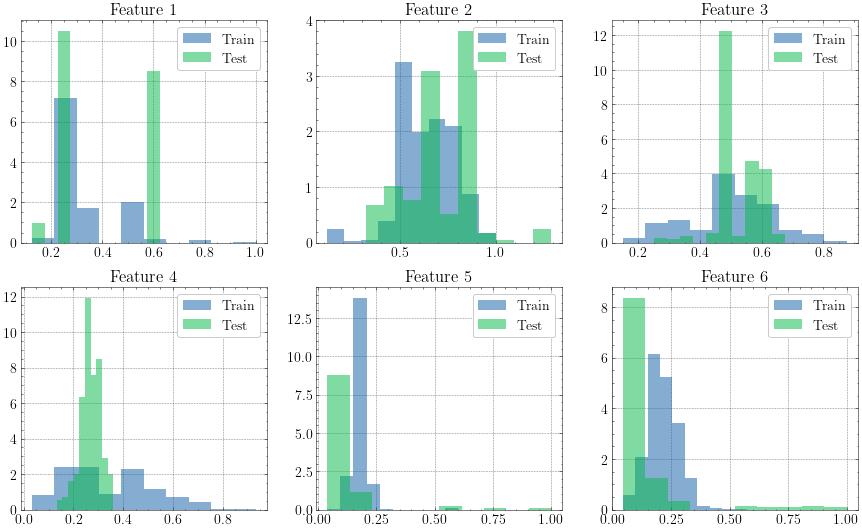

In [48]:
def plot_distributions(X_train, X_test):
    """
    Plot all the distribution (histograms) for the reafures of the train and test set
    Args:
        X_train (DataFrame): Train Dataset
        X_test (DataFrame): Test Dataset
    Returns:
        Plots of all the features, where each plot will show the histogram of the train vs the test datasets
    """
    plt.figure(figsize=(15,9))
    for i in range(6):
        plt.subplot(231+i)
        plt.hist(X_train.values[:,i],density=True, alpha = 0.5)
        plt.hist(X_test.values[:,i],density=True, alpha = 0.5)
        plt.title('Feature '+str(i+1))
        plt.legend(['Train','Test'])
        
plot_distributions(X_train, X_test)       

This is an important finding. The distribution from the datasets looks apparently big. In order to test this we calculate the Kolmogorov-Smirnov distance of the cumulative distribution function (cumulative distribution function).

In [80]:
def distance_calculation(X_train, X_test):
    """
    Calculate the Kolmogorov-Smirnov distances of the CDF between train and test datasets
    Args:
        X_train (DataFrame): Train Dataset
        X_test (DataFrame): Test Dataset
    Returns:
        distances (list) : List of the distances of the features
    """
    return list(map(lambda i : stats.ks_2samp(X_train.iloc[:,i],X_test.iloc[:,i]).statistic,range(X_train.shape[1])))

distances = distance_calculation(X_train, X_test)
print('The Kolmogorov-Smirnov distances betwwen the cumulative distribution of train dataset and test dataset per feature are: ')
print(distances)

The Kolmogorov-Smirnov distances betwwen the cumulative distribution of train dataset and test dataset per feature are: 
[0.39587676004249656, 0.31959480358799874, 0.21416035718608373, 0.4249384741591468, 0.7580924972094837, 0.7524240508882584]


The closest is the Kolmogorov-Smirnov distance between 2 CDFs to 1, the less similar are two distributions. We can see here that all the distances are high. This is confirming the fact that the test dataset is far from being a part similar to the train set. 

The goal of the model is to generalize the properties of a training dataset (supervised ML). For this case, the test is not a sample from the training dataset, which means that forehand I know the results of the classifier could be poor.

For this case, all the following analyses will be done just for the original train and datasets. In the last part, the models implemented will be run again in a dataset which is the shuffle dataset of the train and test in order to ensure both datasets follow a similar distribution

# Task 1: Models

## Models

I started with the most simple method: Linear regression.
For a binary classification problem it is not advisable to use linear regression, it may be more useful use logistic regression. However, it is implemented to analyze the influence of the features in the output.


### (Multiple) Lineal regression

For the first lineal regression model we just create a linear combination of all the features.
The following is the model:


$$
Label = \beta_0 + \beta_1 Feature_1 + \beta_2 Feature_2 + \beta_3 Feature_3 + \beta_4 Feature_4 + \beta_5 Feature_5 + \beta_6 Feature_6  + \varepsilon
$$

In [10]:
# Definition of the model and fit
formula = 'Label ~ Feature_1 + Feature_2 + Feature_3 + Feature_4 + Feature_5'
model = sm.ols(formula = formula, data = data_train_renamed)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Label   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     30.11
Date:                Sun, 14 May 2023   Prob (F-statistic):           6.46e-29
Time:                        20:54:16   Log-Likelihood:                -813.29
No. Observations:                1219   AIC:                             1639.
Df Residuals:                    1213   BIC:                             1669.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2334      0.106     -2.209      0.0

From the summary we can see in the $R^2$ value is 11%, which means that this regression fits the model just by a 11% and that the independent variables explain only a small proportion of the variance in the dependent variable.

The P values are given us the statistical significance of each independent variable. If a p-value is less than 0.05, it means that the corresponding independent variable is statistically significant. For the case of Feature_1, Feature_3, Feature_4, and Feature_5, the p-values shows that are statistically significant variables, while Feature_2 is not. 

Give this case I will try some transforms to how much the model improve.

After trying some transformations in the features, this was the best result. 

$$
Label = \beta_0 + \beta_1 \log(Feature_1) + \beta_2 Feature_2^2 + \beta_3 (Feature_1*Feature_2) + \beta_2 Feature_3^2  + \beta_3 (Feature_4*Feature_5^2)  + \varepsilon
$$

In [11]:
# Creating new combinatoin and naming them Feature 7 and 8
data_train_renamed['Feature_7'] = data_train_renamed['Feature_1'] * data_train_renamed['Feature_2']
data_train_renamed['Feature_8'] = (data_train_renamed['Feature_4'] )* (data_train_renamed['Feature_5']**2)

formula1 = 'Label ~ np.log(Feature_1)+ Feature_2 + I(Feature_2**2) + Feature_7 + I(Feature_3**2) + Feature_8'
model = sm.ols(formula = formula1, data = data_train_renamed)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Label   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     32.67
Date:                Sun, 14 May 2023   Prob (F-statistic):           1.29e-36
Time:                        20:54:20   Log-Likelihood:                -793.23
No. Observations:                1219   AIC:                             1600.
Df Residuals:                    1212   BIC:                             1636.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.7215      0.27

From the summary we can see in the $R^2$ value is now  14%, which means this model improved but still just fit a 14% the data.

The P values are now telling us that all features in the model are significant

#### Partial conclusions
- Linear regression allow us to understand the statistical significance of the features
- For this case the linear regression is not suited and the  $R^2$ (14%) show us that these linear models are not the best option for this data
- We have to switch to another kind of classifiers 

### Statistical Models: GNB, SVM, Logistic Regression, Random Forest and Decision Tree

Gaussian Naive Bayes, Support Vector Machine (SVM), Logistic Regressoin method, Random Forest and Decision Tree will be implemented.

For the specific case of the SVM all the possible kernel were tried and the best result was the linear one.
For the case of the Logistic Regression, just with 100 interations the model could converge.

After create the models some metrics will be calculated in order to interpret the results

In [23]:
# Convert data frames to NumPy arrays 
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = Y_train
y_test_np = Y_test


def models(x_train_np,y_train_np, x_test_np, y_test_np):
    """
    Implement 6 diferent classification models ('GNB', 'SVM', 'Logistic Regression', 
    'Random Forest', 'Decision Tree', 'Gradient Boosting') and calculate the metrics required to evaluate the models:
    accuracy, precision, recall, f2-score
    Args:
        x_train_np (np.array): Train Dataset of features
        y_train_np (np.array): Lables for train Dataset
        
        x_test_np (np.array): Test Dataset of features
        y_test_np (np.array): Lables for test Dataset

    Returns:
        acccuracy_score_arr (array): Array of the accuracy of the models
        f1_score_arr (array): Array of the f1 score of the models
        presicion_score_arr (array): Array of the precision of the models
        recall_score_arr (array):  Array of the recall of the models
        cm (array) : Array of the confusion matrix values of the models
    """
    
    # Initializing methods
    gnb = GaussianNB()
    svm = SVC(kernel='linear')
    logreg = LogisticRegression(max_iter=100)
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=10, random_state=0)

    classifier = [gnb, svm, logreg, rf, dt, clf]

    # Metrics arrays
    acccuracy_score_arr = []
    f1_score_arr = []
    presicion_score_arr = []
    recall_score_arr = []
    cm = []

    # Running all the classifiers and saving the matrics
    for case in classifier:
        case.fit(x_train_np, y_train_np)
        pred = case.predict(x_test_np)

        #Calculate metrics
        accuracy = accuracy_score(y_test_np, pred)
        f_score = f1_score(y_test_np, pred)
        conf = confusion_matrix(y_test_np, pred)
        precision = precision_score(y_test_np, pred)
        recall = recall_score(y_test_np, pred)

        #Append metrics
        acccuracy_score_arr.append(accuracy)
        f1_score_arr.append(f_score)
        presicion_score_arr.append(precision)
        recall_score_arr.append(recall)
        cm.append(conf)
    return acccuracy_score_arr, f1_score_arr, presicion_score_arr, recall_score_arr, cm

acccuracy_score_arr, f1_score_arr, presicion_score_arr, recall_score_arr, cm = models(X_train_np, \
                                                                                      y_train_np,\
                                                                                      X_test_np,\
                                                                                      y_test_np)

# Task 2: Metrics

In [82]:
title = ['GNB', 'SVM', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

def metrics(title,acccuracy_score_arr,f1_score_arr, presicion_score_arr, recall_score_arr):
    
    """
    Print the matrics repect to the model
    Args:
        title(array): Array of the name of the models
        acccuracy_score_arr (array): Array of the accuracy of the models
        f1_score_arr (array): Array of the f1 score of the models
        presicion_score_arr (array): Array of the precision of the models
        recall_score_arr (array):  Array of the recall of the models
        cm (array) : Array of the confusion matrix values of the models

    Returns:
    Print the metrics
    """
    
    for name,i,j,k,l in zip(title,acccuracy_score_arr,f1_score_arr, presicion_score_arr, recall_score_arr):
        print(f'The accuracy for {name} is {round(i*100,2)}%')
        print(f'The f1 score for {name} is {round(j*100,2)}%')
        print(f'The precision score for {name} is {round(k*100,2)}%')
        print(f'The recall score for {name} is {round(l*100,2)}%')
        print('')
        
metrics(title,acccuracy_score_arr,f1_score_arr, presicion_score_arr, recall_score_arr)

The accuracy for GNB is 51.23%
The f1 score for GNB is 14.39%
The precision score for GNB is 66.67%
The recall score for GNB is 8.06%

The accuracy for SVM is 53.69%
The f1 score for SVM is 50.22%
The precision score for SVM is 55.34%
The recall score for SVM is 45.97%

The accuracy for Logistic Regression is 55.74%
The f1 score for Logistic Regression is 36.47%
The precision score for Logistic Regression is 67.39%
The recall score for Logistic Regression is 25.0%

The accuracy for Random Forest is 52.46%
The f1 score for Random Forest is 38.3%
The precision score for Random Forest is 56.25%
The recall score for Random Forest is 29.03%

The accuracy for Decision Tree is 56.15%
The f1 score for Decision Tree is 45.69%
The precision score for Decision Tree is 61.64%
The recall score for Decision Tree is 36.29%

The accuracy for Gradient Boosting is 54.51%
The f1 score for Gradient Boosting is 28.39%
The precision score for Gradient Boosting is 70.97%
The recall score for Gradient Boostin

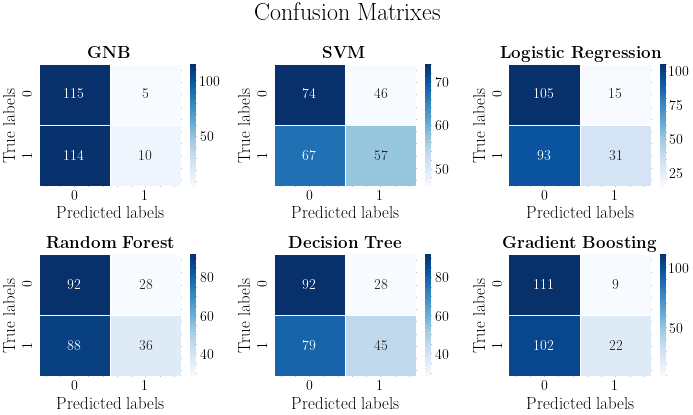

In [83]:
# Plot Confusion matrix

def plot_models(cm):
    """
    Plot the confusion matrix
    Args:
        cm (array): Array of the confusion matrix values of the models

    Returns:
        None, just plots
    """
    fig, axs = plt.subplots(2, 3, figsize=(10,6))
    axs = axs.flatten()

    for i,cfmtx in enumerate(cm):
        sns.heatmap(cfmtx, annot=True, cmap='Blues', linewidths=0.6, fmt='g', 
                    xticklabels=[0,1], yticklabels=[0,1], ax=axs[i])
        axs[i].set_xlabel('Predicted labels', size = 17)
        axs[i].set_ylabel('True labels', size = 17)
        axs[i].set_title( r'\textbf{{{}}}'.format(title[i] ) , size = 17)
    fig.suptitle('Confusion Matrixes', fontsize=24)
    plt.tight_layout()
plot_models(cm)

The possible interpretation of these confusion matrices is given by the accuracy, precision, recall and f1 score. Discussion below

#### Partial conclusions

- Best accuracy: Decision Tree
- Best f1 score: SVM
- Best precision:Gradient Boosting  
- Best recall SVM 
- For this cases still the model is not robust.
- For this balanced data the accuracy is still an important metric and the one to first metrics to choose the best model. For these options the best one was the Decision Tree model 
- Based on the data the model should be picked. In case we need to be as correct as possible the precision metric should more important than the accuracy.
- Recall would be important depending on the data, for cases where false negatives are extremely dangerous, like a medial diagnosis.
- F1 Score is the best balance between recall and precision, this should be taken into account once the accuracy is robust.
- The model need to be improved.

## New dataset

As it was mentioned in the EDA process, the test dataset does not have a similar distribution from the train dataset.

The solution proposed, based on the fact that it is not available information about the dataset, is to join both dataset and then shuffle and split to create a new train and test datasets.

In [86]:
# Join dataset 
frames = [data_train, data_test]
new_dataset = pd.concat(frames)
# new_dataset = data_train.rename(columns={"Feature 1": "Feature_1","Feature 2": "Feature_2","Feature 3": "Feature_3","Feature 4": "Feature_4","Feature 5": "Feature_5","Feature 6": "Feature_6"})


X_new = new_dataset.drop(["Label"]  ,axis=1)
Y_new = new_dataset.loc[:,'Label'].values

# Create new dataset (80% Train, 20% Test) based on a unique dataset. Random_state shuffle the data
X_train__, X_test_, y_train_, y_test_ = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)

In [94]:
# Convert data frames to NumPy arrays 
X_train_np_shuffled = X_train__.to_numpy()
X_test_np_shuffled = X_test_.to_numpy()
y_train_np_shuffled = y_train_
y_test_np_shuffled = y_test_

In [96]:
# Apply again all the models

acccuracy_score_arr_shuffled, f1_score_arr_shuffled, presicion_score_arr_shuffled, recall_score_arr_shuffled, \
                            cm_shuffled = models(X_train_np_shuffled, y_train_np_shuffled,\
                                                 X_test_np_shuffled, y_test_np_shuffled)

The accuracy for GNB is 64.85%
The f1 score for GNB is 63.35%
The precision score for GNB is 66.92%
The recall score for GNB is 60.14%

The accuracy for SVM is 63.82%
The f1 score for SVM is 62.41%
The precision score for SVM is 65.67%
The recall score for SVM is 59.46%

The accuracy for Logistic Regression is 61.77%
The f1 score for Logistic Regression is 62.67%
The precision score for Logistic Regression is 61.84%
The recall score for Logistic Regression is 63.51%

The accuracy for Random Forest is 76.79%
The f1 score for Random Forest is 77.03%
The precision score for Random Forest is 77.03%
The recall score for Random Forest is 77.03%

The accuracy for Decision Tree is 73.38%
The f1 score for Decision Tree is 71.94%
The precision score for Decision Tree is 76.92%
The recall score for Decision Tree is 67.57%

The accuracy for Gradient Boosting is 77.82%
The f1 score for Gradient Boosting is 77.66%
The precision score for Gradient Boosting is 79.02%
The recall score for Gradient Boos

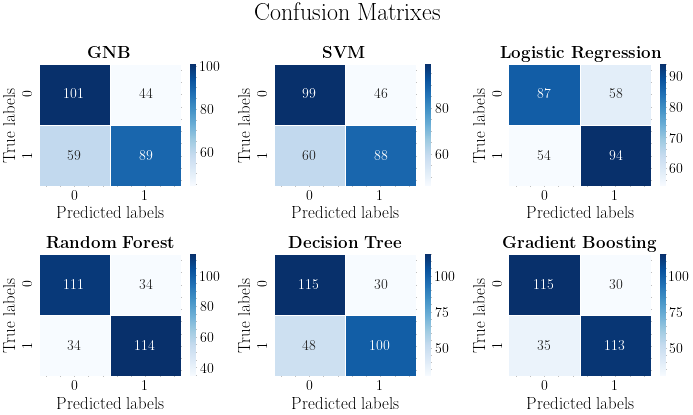

In [99]:
# Plot metris and confusion matrix
metrics(title,acccuracy_score_arr_shuffled, f1_score_arr_shuffled, presicion_score_arr_shuffled, recall_score_arr_shuffled)

plot_models(cm_shuffled)

As we see the models improve consistently. Now the best model is the Gradient Boosting Classifier. All the metrics are better in this model.

The accuracy of model improved from 54.5% to 77.8% just by joining the datasets and shuffle the final dataset. Still is a model that could be improved 

## Conclusions

The dataset present some conditions: 
- Missing validation data
- Balanced dataset
- Complete dataset (not missing data)
- Lack of information about the origin of the data
- Test dataset does not represent a sample from the train dataset

Based on these conditions several models and strategies where implemented given as result to the best model:
-  Gradient Boosting Classifier with a data set joined and shuffled

This model could be improved. The first proposal would be to try some deep Learning: To start, an MLP network with 1 hidden layer. Check is the accuracy improve. If not, one option could be Data Augmentation. Take into account that a previous scatter plot show that the separability of the classes would be a hard work for linear models, because of that is possible that many layers are required to make this classifier reach a robust accuracy. For this reason I do not see DeepLearning for this kind of problems like the best first option to explore, besides the dataset is limited.
- Possible data Augmentation: 
    - Create new data with noise

Metrics from the best model:
- The accuracy for Gradient Boosting is 77.82%
- The f1 score for Gradient Boosting is 77.66%
- The precision score for Gradient Boosting is 79.02%
- The recall score for Gradient Boosting is 76.35%
